In [66]:
import pandas as pd
import glob

# Path ke folder yang berisi file CSV
folder_path = "D:\Documents\Tugas Akhir\Recommender System\Dataset\*.csv"

# Ambil semua file CSV dalam folder
csv_files = glob.glob(folder_path)

# List untuk menyimpan data dari setiap file
dataframes = []

# Loop untuk membaca setiap file CSV
for file in csv_files:
    print(f"Membaca file: {file}")
    df = pd.read_csv(file,  sep=';', encoding='ISO-8859-1')
    dataframes.append(df)


Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Acne_Cream.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\acne_pimple_patch.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Ampoule.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\booster.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Clay_Mask.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\cleansing_Balm.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Cleansing_Bar_Powder.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\cleansing_cream.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Cleansing_Gel.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Cleansing_Oil.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\cleansing_wipes.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Essence.csv
M

In [67]:
df = dataframes[0] 
df.head()

,name,brand,price,ingredients,rating,sub-category,category,benefit
0,Biome Ultimate Indulging Cream,AXIS-Y,Rp229.000,"Water, Glycerin, Betaine, Methylpropanediol, C...",4.9,Acne Cream,Treatment,"meningkatkan elastisitas kulit, membuat kulit ..."
1,SOS Acne Gel,BLP BEAUTY,Rp39.500,"Water, Camellia Sinensis Leaf Extract, Butylen...",5.0,Acne Cream,Treatment,merawat jerawat secara efektif dan efisien tan...
2,Brightening Cream,FOCALSKIN,Rp120.320,"AQUA, BUTYLENE GLYCOL, HYDROGENATED POLYISOBUT...",0.0,Acne Cream,Treatment,"Mencerahkan wajah, Mengurangi kulit kusam, men..."
3,Licorice Advanced Peeling Gel,NPURE,Rp65.000,"Water, Glycerin, Cellulose, Dipropylene Glycol...",4.8,Acne Cream,Treatment,"membantu mencerahkan kulit yang kusam, mengang..."
4,Krim Penghilang Noda Bekas Jerawat Luka & Stre...,BREYLEE,Rp100.000,"Aqua, Glycerin, Centella Asiatica Extract, Arb...",4.5,Acne Cream,Treatment,"menyamarkan bekas jerawat, C-Section, dan luka..."


In [ ]:
for i, df in enumerate(dataframes):
    print(f"File ke-{i+1} memiliki kolom: {df.columns.tolist()}")


In [68]:
# Gabungkan semua data CSV menjadi satu DataFrame
skincare = pd.concat(dataframes, ignore_index=True)

# Cek hasilnya
skincare.head()


,name,brand,price,ingredients,rating,sub-category,category,benefit
0,Biome Ultimate Indulging Cream,AXIS-Y,Rp229.000,"Water, Glycerin, Betaine, Methylpropanediol, C...",4.9,Acne Cream,Treatment,"meningkatkan elastisitas kulit, membuat kulit ..."
1,SOS Acne Gel,BLP BEAUTY,Rp39.500,"Water, Camellia Sinensis Leaf Extract, Butylen...",5.0,Acne Cream,Treatment,merawat jerawat secara efektif dan efisien tan...
2,Brightening Cream,FOCALSKIN,Rp120.320,"AQUA, BUTYLENE GLYCOL, HYDROGENATED POLYISOBUT...",0.0,Acne Cream,Treatment,"Mencerahkan wajah, Mengurangi kulit kusam, men..."
3,Licorice Advanced Peeling Gel,NPURE,Rp65.000,"Water, Glycerin, Cellulose, Dipropylene Glycol...",4.8,Acne Cream,Treatment,"membantu mencerahkan kulit yang kusam, mengang..."
4,Krim Penghilang Noda Bekas Jerawat Luka & Stre...,BREYLEE,Rp100.000,"Aqua, Glycerin, Centella Asiatica Extract, Arb...",4.5,Acne Cream,Treatment,"menyamarkan bekas jerawat, C-Section, dan luka..."


In [69]:
skincare.shape

(2820, 8)

In [57]:
print(skincare.isna().sum())


name            0
brand           0
price           0
ingredients     0
rating          0
sub-category    0
category        0
benefit         0
dtype: int64


In [58]:
skincare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2820 non-null   object 
 1   brand         2820 non-null   object 
 2   price         2820 non-null   object 
 3   ingredients   2820 non-null   object 
 4   rating        2820 non-null   float64
 5   sub-category  2820 non-null   object 
 6   category      2820 non-null   object 
 7   benefit       2820 non-null   object 
dtypes: float64(1), object(7)
memory usage: 176.4+ KB


In [70]:
import re

# Fungsi untuk mengubah hanya harga pertama dari rentang
def convert_currency(price):
    price = str(price)

    # Jika harga dalam rentang, ambil harga pertama sebelum '-'
    if ' - ' in price:
        price_first = price.split(' - ')[0]
    else:
        price_first = price  # Jika harga hanya satu (bukan rentang)
    
    # Menghapus karakter non-digit dan konversi ke angka
    price_first = re.sub(r'\D', '', price_first)
    return int(price_first)

# Terapkan fungsi ke kolom 'price'
skincare['price'] = skincare['price'].apply(convert_currency)

skincare.head()


,name,brand,price,ingredients,rating,sub-category,category,benefit
0,Biome Ultimate Indulging Cream,AXIS-Y,229000,"Water, Glycerin, Betaine, Methylpropanediol, C...",4.9,Acne Cream,Treatment,"meningkatkan elastisitas kulit, membuat kulit ..."
1,SOS Acne Gel,BLP BEAUTY,39500,"Water, Camellia Sinensis Leaf Extract, Butylen...",5.0,Acne Cream,Treatment,merawat jerawat secara efektif dan efisien tan...
2,Brightening Cream,FOCALSKIN,120320,"AQUA, BUTYLENE GLYCOL, HYDROGENATED POLYISOBUT...",0.0,Acne Cream,Treatment,"Mencerahkan wajah, Mengurangi kulit kusam, men..."
3,Licorice Advanced Peeling Gel,NPURE,65000,"Water, Glycerin, Cellulose, Dipropylene Glycol...",4.8,Acne Cream,Treatment,"membantu mencerahkan kulit yang kusam, mengang..."
4,Krim Penghilang Noda Bekas Jerawat Luka & Stre...,BREYLEE,100000,"Aqua, Glycerin, Centella Asiatica Extract, Arb...",4.5,Acne Cream,Treatment,"menyamarkan bekas jerawat, C-Section, dan luka..."


In [72]:
skincare['price'].min()

6250

In [75]:
# Simpan gabungan data ke file baru
skincare.to_csv("D:\Documents\Tugas Akhir\Recommender System\skincare.csv", index=False)

In [2]:
import pandas as pd
skincare = pd.read_csv("skincare.csv")

In [12]:
skincare.head()

,name,brand,price,ingredients,rating,sub-category,category,benefit
0,Biome Ultimate Indulging Cream,AXIS-Y,229000,"Water, Glycerin, Betaine, Methylpropanediol, C...",4.9,Acne Cream,Treatment,"meningkatkan elastisitas kulit, membuat kulit ..."
1,SOS Acne Gel,BLP BEAUTY,39500,"Water, Camellia Sinensis Leaf Extract, Butylen...",5.0,Acne Cream,Treatment,merawat jerawat secara efektif dan efisien tan...
2,Brightening Cream,FOCALSKIN,120320,"AQUA, BUTYLENE GLYCOL, HYDROGENATED POLYISOBUT...",0.0,Acne Cream,Treatment,"Mencerahkan wajah, Mengurangi kulit kusam, men..."
3,Licorice Advanced Peeling Gel,NPURE,65000,"Water, Glycerin, Cellulose, Dipropylene Glycol...",4.8,Acne Cream,Treatment,"membantu mencerahkan kulit yang kusam, mengang..."
4,Krim Penghilang Noda Bekas Jerawat Luka & Stre...,BREYLEE,100000,"Aqua, Glycerin, Centella Asiatica Extract, Arb...",4.5,Acne Cream,Treatment,"menyamarkan bekas jerawat, C-Section, dan luka..."


### Statistika Deskriptif

C:\Users\Euis\AppData\Local\Temp\ipykernel_11240\2615571184.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_cat_count.index, y=sub_cat_count.values, palette='viridis')


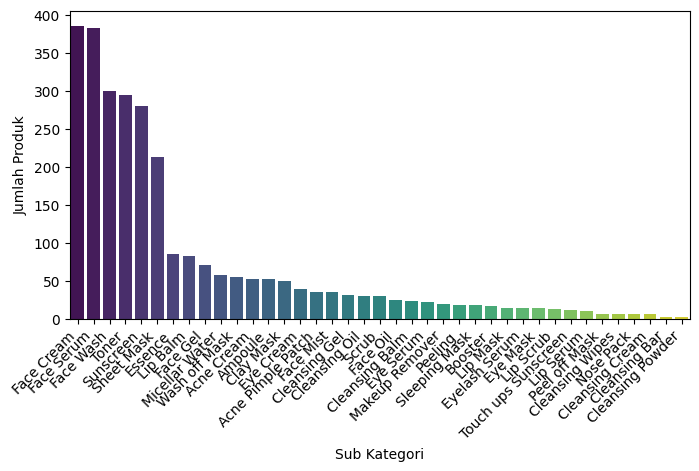

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah produk per sub kategori
sub_cat_count = skincare['sub-category'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=sub_cat_count.index, y=sub_cat_count.values, palette='viridis')
plt.xlabel('Sub Kategori')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45, ha='right')
plt.show()

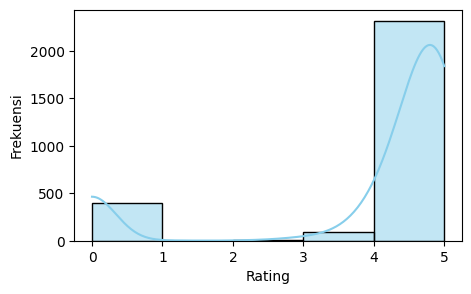

In [78]:
# Plot histogram rating
plt.figure(figsize=(5, 3))
sns.histplot(skincare['rating'], bins=5, kde=True, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

C:\Users\Euis\AppData\Local\Temp\ipykernel_11240\1625285020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='category', y='price', data=skincare, palette='muted')


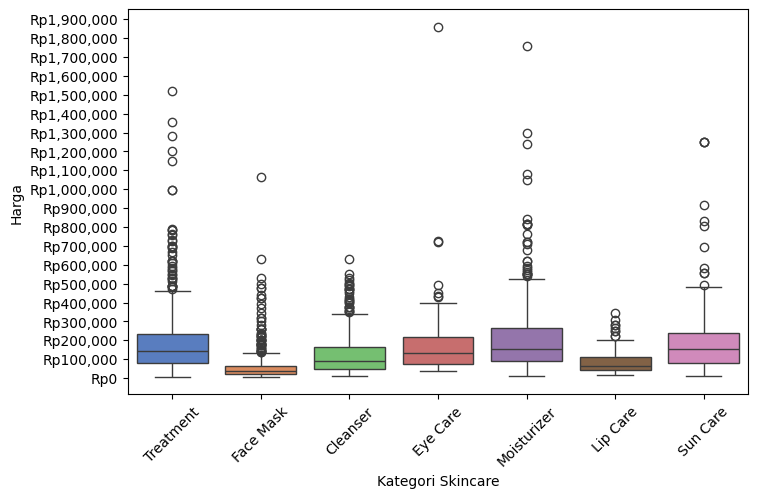

In [79]:
import matplotlib.ticker as mticker

plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='category', y='price', data=skincare, palette='muted')

# Format sumbu Y ke dalam format rupiah
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'Rp{x:,.0f}'))

# Tambahkan lebih banyak tick marks di sumbu Y
ax.yaxis.set_major_locator(mticker.MultipleLocator(100000)) 

# Tambahkan label dan title
plt.xlabel('Kategori Skincare')
plt.ylabel('Harga')

# Rotasi label kategori supaya tidak bertumpuk
plt.xticks(rotation=45)

plt.show()


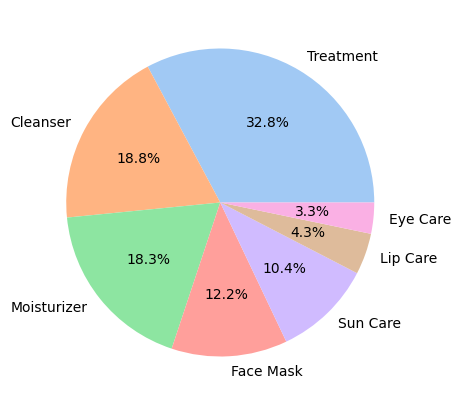

In [80]:
plt.figure(figsize=(6, 5))
category_counts = skincare['category'].value_counts()
category_percentages = category_counts / category_counts.sum() * 100

plt.pie(category_percentages, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.show()

### Data Preprocessing

1. Gabungkan kolom sub-category dengan benefit
2. mengubah teks menjadi lower case
3. menghapus karakter, tanda baca, angka yang tidak digunakan
4. melakukan tokenizing
5. menghapus stopword
6. steaming
7. lakukan langkah 2-4 pada kolom ingredients

In [81]:
import re
import pandas as pd

# Fungsi preprocessing yang benar
def preprocess_text(text):
    if pd.isna(text):  # Cek apakah nilai NaN
        return ""  # Kembalikan string kosong jika NaN
    text = text.lower()  # Ubah menjadi huruf kecil
    text = re.sub(r'[^\w\s]', ' ', text)  # Ganti tanda baca dengan spasi
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus double space dan spasi di awal/akhir
    return text

# Terapkan ke kolom 'benefit' dan simpan di 'benefit_clean'
skincare['benefit_clean'] = skincare['benefit'].apply(preprocess_text)


In [82]:
skincare[['benefit', 'benefit_clean']].head()

,benefit,benefit_clean
0,"meningkatkan elastisitas kulit, membuat kulit ...",meningkatkan elastisitas kulit membuat kulit l...
1,merawat jerawat secara efektif dan efisien tan...,merawat jerawat secara efektif dan efisien tan...
2,"Mencerahkan wajah, Mengurangi kulit kusam, men...",mencerahkan wajah mengurangi kulit kusam mengu...
3,"membantu mencerahkan kulit yang kusam, mengang...",membantu mencerahkan kulit yang kusam mengangk...
4,"menyamarkan bekas jerawat, C-Section, dan luka...",menyamarkan bekas jerawat c section dan luka o...


In [ ]:
pip install nltk

In [5]:
import nltk
from nltk.tokenize import word_tokenize

# Download resource yang diperlukan jika belum ada
nltk.download('punkt')
nltk.download('punkt_tab')

# Tokenisasi kolom 'benefit_clean' pada DataFrame skincare
skincare['benefit_clean'] = skincare['benefit_clean'].apply(lambda x: word_tokenize(str(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Euis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Euis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
skincare['benefit_clean']

In [5]:
import nltk
from nltk.corpus import stopwords

# Download stopwords jika belum ada
nltk.download('stopwords')

# Daftar stopwords bahasa Indonesia dan Inggris
indo = stopwords.words('indonesian')
eng = stopwords.words('english')

# Gabungkan daftar stopwords bahasa Indonesia dan Inggris
list_stopwords = indo
list_stopwords.extend(eng)

# Daftar kata yang akan dikecualikan dari stopwords
exclude_words = ['tidak', 'tanpa']

# Fungsi untuk menghapus stopwords dari list token dengan pengecualian
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords or word in exclude_words]

# Terapkan stopword removal pada kolom 'benefit_clean' setelah tokenisasi
skincare['benefit_clean'] = skincare['benefit_clean'].apply(lambda x: stopwords_removal(x))

# Cek hasilnya
print(skincare['benefit_clean'].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Euis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [meningkatkan, elastisitas, kulit, kulit, berk...
1    [merawat, jerawat, efektif, efisien, tanpa, me...
2    [mencerahkan, wajah, mengurangi, kulit, kusam,...
3    [membantu, mencerahkan, kulit, kusam, mengangk...
4    [menyamarkan, bekas, jerawat, c, section, luka...
Name: benefit_clean, dtype: object


In [ ]:
pip install swifter

In [32]:
# Mengubah list pada kolom 'benefit_clean' menjadi string
skincare['benefit_clean'] = skincare['benefit_clean'].agg(lambda x: ' '.join(x))

C:\Users\Euis\AppData\Local\Temp\ipykernel_12172\1821765710.py:2: FutureWarning: using <function <lambda> at 0x000001144BBCF7F0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  skincare['benefit_clean'] = skincare['benefit_clean'].agg(lambda x: ' '.join(x))


In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming setiap kata
def stemmed_wrapper(term):
    return stemmer.stem(term)

# Mendapatkan daftar kata (unique terms) pada kolom 'benefit_clean'
term_dict = {}

# Iterasi untuk menambah kata ke dalam term_dict
for document in skincare['benefit_clean']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Melakukan stemming pada setiap kata dalam term_dict
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

# Terapkan stemming pada kolom 'benefit_clean' di DataFrame
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

# Terapkan fungsi stemming pada kolom 'benefit_clean' dengan swifter untuk mempercepat
skincare['benefit_clean'] = skincare['benefit_clean'].swifter.apply(get_stemmed_term)

# Mengubah list pada kolom 'benefit_clean' menjadi string
skincare['benefit_clean'] = skincare['benefit_clean'].agg(lambda x: ' '.join(x))

# Cek hasilnya
print(skincare['benefit_clean'].head())


c:\Users\Euis\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Pandas Apply: 100%|██████████| 2820/2820 [00:00<00:00, 131984.66it/s]

0    tingkat elastisitas kulit buat kulit lebih kil...
1    rawat jerawat cara efektif dan efisien tanpa t...
2    cerah wajah kurang kulit kusam kurang bintik b...
3    bantu cerah kulit yang kusam angkat sel kulit ...
4    samar bekas jerawat c section dan luka operasi...
Name: benefit_clean, dtype: object


In [ ]:
# Setel agar kolom dapat menampilkan teks yang lebih panjang
pd.set_option('display.max_colwidth', None)

# Cek DataFrame
print(skincare['benefit_clean'])


In [7]:
# libraries for Recommendation System   
from sklearn.feature_extraction.text import TfidfVectorizer   
    
# TF-IDF Vectorizer   
tfidf_manfaat = TfidfVectorizer()   
      
# membangun matriks TF-IDF     
tfidf_matrix_manfaat = tfidf_manfaat.fit_transform(skincare['benefit_clean'])     
      
# output the shape of tfidf_matrix     
tfidf_matrix_manfaat.shape 

(2820, 1476)

In [16]:
import pandas as pd

# Mengonversi TF-IDF matriks menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix_manfaat.toarray(), columns=tfidf_manfaat.get_feature_names_out())

# Menampilkan 5 baris pertama dari DataFrame
print(tfidf_df.tail())


      abur  acid  acne  acnes  activating  acwell  adang  afterfeel  agam  \
2815   0.0   0.0   0.0    0.0         0.0     0.0    0.0        0.0   0.0   
2816   0.0   0.0   0.0    0.0         0.0     0.0    0.0        0.0   0.0   
2817   0.0   0.0   0.0    0.0         0.0     0.0    0.0        0.0   0.0   
2818   0.0   0.0   0.0    0.0         0.0     0.0    0.0        0.0   0.0   
2819   0.0   0.0   0.0    0.0         0.0     0.0    0.0        0.0   0.0   

      age  ...  whiteheads  whitening  willow  wood  wrinkle  yanpa   yg  zat  \
2815  0.0  ...         0.0        0.0     0.0   0.0      0.0    0.0  0.0  0.0   
2816  0.0  ...         0.0        0.0     0.0   0.0      0.0    0.0  0.0  0.0   
2817  0.0  ...         0.0        0.0     0.0   0.0      0.0    0.0  0.0  0.0   
2818  0.0  ...         0.0        0.0     0.0   0.0      0.0    0.0  0.0  0.0   
2819  0.0  ...         0.0        0.0     0.0   0.0      0.0    0.0  0.0  0.0   

      zero  zona  
2815   0.0   0.0  
2816   0.0  

In [14]:
# Export DataFrame ke CSV
df_word_freq.to_csv("word_frequencies.csv", index=False)


In [17]:
# Mendapatkan daftar fitur (kata) yang unik yang digunakan oleh TF-IDF
features = tfidf_manfaat.get_feature_names_out()

# Menampilkan semua kata yang unik
print(features)


['abur' 'acid' 'acne' ... 'zat' 'zero' 'zona']


In [43]:
# Simpan fitur ke dalam file .txt
with open("unique_words.txt", "w", encoding="utf-8") as f:
    for feature in tfidf.get_feature_names_out():
        f.write(feature + "\n")



In [18]:
import pandas as pd
import re
import unicodedata
from sklearn.feature_extraction.text import TfidfVectorizer

# Fungsi untuk membersihkan karakter sesuai dengan kebutuhan
def custom_preprocess(text):
    if pd.isna(text):  # Jika NaN, ganti dengan string kosong
        return ""
    
    # Normalisasi Unicode untuk menghilangkan karakter encoding yang aneh
    text = unicodedata.normalize('NFKD', text)
    
    # Ubah menjadi huruf kecil
    text = text.lower()

    # Hapus semua simbol/karakter/tanda baca dan angka
    text = re.sub(r'[^\w\s]', ' ', text)  # Ganti tanda baca (karakter selain huruf dan spasi) dengan spasi
    text = re.sub(r'\d+', '', text)  # Hapus angka

    # Hapus double space dan spasi di awal/akhir
    text = re.sub(r'\s+', ' ', text).strip()  # Mengubah double space menjadi single space dan menghapus spasi di awal/akhir
    
    return text

# Terapkan preprocessing ke kolom 'ingredients'
skincare['ingredients_clean'] = skincare['ingredients'].apply(custom_preprocess)

# Gunakan TF-IDF untuk mengubah data teks menjadi matriks
tfidf_ingredients = TfidfVectorizer(ngram_range=(1, 2))  # Menggunakan unigram dan bigram
tfidf_matrix_ingredients = tfidf_ingredients.fit_transform(skincare['ingredients_clean'])

# Tampilkan fitur hasil TF-IDF
print(tfidf_ingredients.get_feature_names_out())


['aacrylates' 'aacrylates alkyl' 'aativa' ... 'ziziphus jujuba'
 'zymomonas' 'zymomonas ferment']


In [19]:
import pandas as pd

# Mengonversi TF-IDF matriks menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix_ingredients.toarray(), columns=tfidf_ingredients.get_feature_names_out())

# Menampilkan 5 baris pertama dari DataFrame
print(tfidf_df.head())

   aacrylates  aacrylates alkyl  aativa  aativa meal  abcorbyl  \
0         0.0               0.0     0.0          0.0       0.0   
1         0.0               0.0     0.0          0.0       0.0   
2         0.0               0.0     0.0          0.0       0.0   
3         0.0               0.0     0.0          0.0       0.0   
4         0.0               0.0     0.0          0.0       0.0   

   abcorbyl glucoside  abeille  abeille lanolin  abeille triglycerides  \
0                 0.0      0.0              0.0                    0.0   
1                 0.0      0.0              0.0                    0.0   
2                 0.0      0.0              0.0                    0.0   
3                 0.0      0.0              0.0                    0.0   
4                 0.0      0.0              0.0                    0.0   

   abelmoschus  ...  zingiber  zingiber officinal  zingiber officinale  \
0          0.0  ...       0.0                 0.0                  0.0   
1         

In [33]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

# Buat One-Hot Encoding untuk sub-category
encoder = OneHotEncoder(handle_unknown='ignore')
subcategory_encoded = encoder.fit_transform(skincare[['sub-category']])  




In [34]:
# Gabungkan ketiga matriks untuk menjadi satu representasi fitur
from scipy.sparse import hstack

tfidf_matrix_combined = hstack([subcategory_encoded, tfidf_matrix_ingredients, tfidf_matrix_manfaat])


In [44]:
# Misalnya, input user:
user_subcategory = 'Face Cream'
user_ingredients = 'centella asiaica'
user_benefits = 'Membersihkan, Menyegarkan'

# Gabungkan input user ke dalam format yang sama dengan data produk
user_input = user_ingredients + " " + user_benefits

# Preprocessing input user (menggunakan fungsi custom preprocess)
user_input_cleaned = custom_preprocess(user_input)

# Terapkan TF-IDF untuk input user (gunakan vectorizer yang sama dengan produk)
user_subcategory_encoded = encoder.transform([[user_subcategory]])
user_tfidf_ingredients = tfidf_ingredients.transform([user_input_cleaned])
user_tfidf_manfaat = tfidf_manfaat.transform([user_input_cleaned])

# Gabungkan hasil TF-IDF input user
user_tfidf_combined = hstack([user_subcategory_encoded, user_tfidf_ingredients, user_tfidf_manfaat])


c:\Users\Euis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [45]:
from sklearn.metrics.pairwise import euclidean_distances

# Hitung Euclidean distance antara input user dan produk
euclidean_dist = euclidean_distances(user_tfidf_combined, tfidf_matrix_combined)

# Tampilkan jarak dari input user ke semua produk
print(euclidean_dist)

[[2.43712639 2.44948974 2.43660794 ... 2.44948974 2.44948974 2.44948974]]


In [46]:
# Fungsi untuk merekomendasikan produk berdasarkan jarak Euclidean
def recommend_products(user_tfidf, distance_matrix, top_n=5):
    # Ambil jarak antara input user dan semua produk
    distances = distance_matrix[0]  # Hanya satu input user (row 0)
    
    # Urutkan berdasarkan jarak terkecil dan ambil top_n produk terdekat
    recommended_indices = distances.argsort()[:top_n]
    
    return recommended_indices

# Rekomendasikan produk berdasarkan input user
recommended_products = recommend_products(user_tfidf_combined, euclidean_dist, top_n=5)

# Tampilkan produk yang direkomendasikan
print(skincare.iloc[recommended_products])


                                      name         brand  price  \
807         Calming Moisture Barrier Cream  PYUNKANG YUL  15600   
599              Rich Moist Soothing Cream   DEAR KLAIRS  29500   
486     SKIN1004 Madagascar Centella Cream      SKIN1004  71630   
666  Centella Asiatica Barrier Moisturizer         NPURE   8500   
517                    Pure Fit Cica Cream         COSRX  28535   

                                           ingredients  rating sub-category  \
807  Water, Dipropylene Glycol, Glycerin, Caprylic/...     5.0   Face Cream   
599  Beta Glucan, Centella Asiatica Extract, Sodium...     4.5   Face Cream   
486  Centella Asiatica Extract, Squalane, Niacinami...     4.7   Face Cream   
666  Water, Butylene Glycol, Centella Asiatica Leaf...     5.0   Face Cream   
517  Centella AsiaticaExtract, Centella Asiatica Le...     4.8   Face Cream   

        category                                            benefit  \
807  Moisturizer  Pelembab ringan dengan pH rendah 

In [48]:
import pandas as pd

# Misalnya, ambil 10 produk dengan jarak terkecil
top_n = 5
recommended_indices = euclidean_dist.argsort()[0][:top_n]

# Buat DataFrame untuk menyimpan hasil rekomendasi
recommendations = skincare.iloc[recommended_indices][['sub-category', 'name', 'ingredients', 'benefit', 'price']]
recommendations.to_csv("recommendations.csv", index=False)

print("File recommendations.csv berhasil dibuat!")


File recommendations.csv berhasil dibuat!
